In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
timing_data_high_cut = pd.read_csv("time_10_ev_1000_part_fatras_1_20_GeV_cut1e-4.txt", sep=" ", header=None)
timing_data_low_cut = pd.read_csv("time_10_ev_1000_part_fatras_1_20_GeV_cut1e-8.txt", sep=" ", header=None)

In [88]:
def plot(data, cut_str, bins, actor_clip, reduction_clip):
    delta_cmps = data[20].to_numpy()
    actor = data[14].to_numpy()
    reduction = data[17].to_numpy()

    fig, ax = plt.subplots(1,5, figsize=(15,4))

    ratio = reduction / actor
    actor = np.clip(actor, actor_clip[0], actor_clip[1])
    reduction = np.clip(reduction, reduction_clip[0], reduction_clip[1])

    ax[0].hist(actor, bins=bins)
    ax[0].set_title("Actor time")
    ax[0].set_xlabel("t [us]")

    ax[1].hist(reduction, bins=bins)
    ax[1].set_title("Reduction time")
    ax[1].set_xlabel("t [us]")

    ax[2].set_title("reduction / actor")
    ax[2].hist(ratio, bins=bins)

    ax[3].bar(*np.unique(delta_cmps, return_counts=True))
    ax[3].set_title("Delta components")

    ax[4].hist2d(delta_cmps, reduction, bins=(20,100), cmap="Blues", vmax=2000)
    #ax[3].scatter(delta_cmps, np.clip(reduction, 0, 50), alpha=0.01)
    ax[4].set_xlabel("delta components")
    ax[4].set_ylabel("rduction time [us]")
    ax[4].set_title("Time vs Delta cmps")

    fig.suptitle("ODD, 10 events a 1000 electrons, FATRAS, 1-20GeV, cut={}".format(cut_str))

    fig.tight_layout()

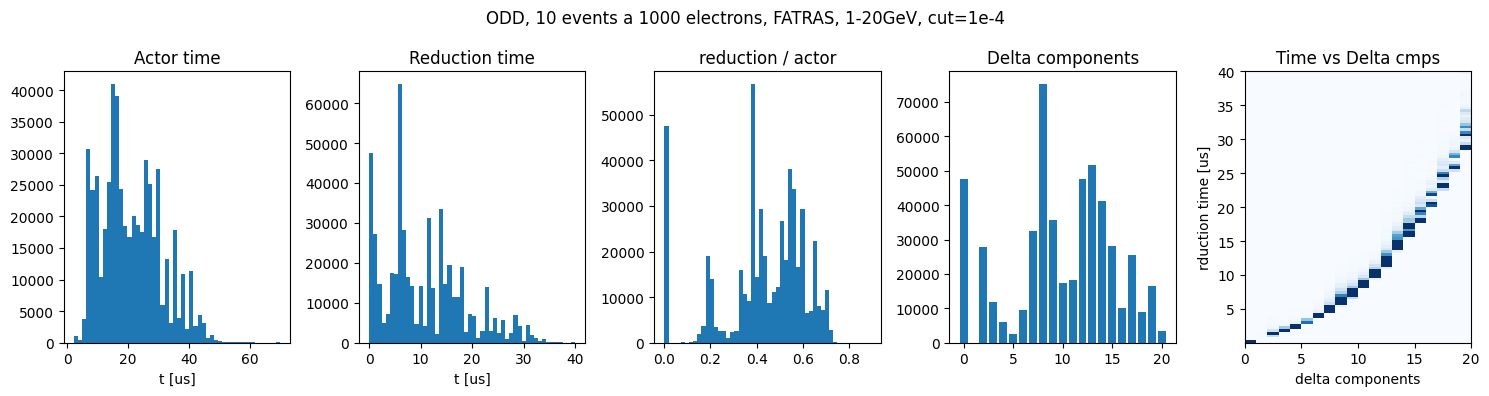

In [105]:
plot(timing_data_high_cut, "1e-4", bins=50, actor_clip=(0,70), reduction_clip=(0,40))

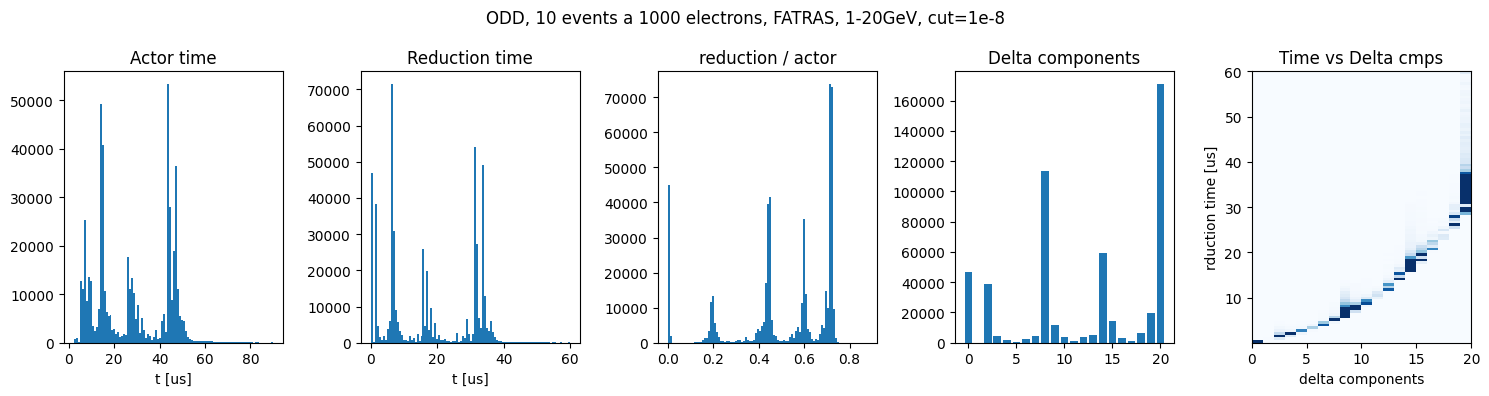

In [104]:
plot(timing_data_low_cut, "1e-8", bins=100, actor_clip=(0,90), reduction_clip=(0,60))